# ***Step 1- Importing libraries & loading dataset***

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/linkdin_Job_data.csv', encoding='utf-8', engine='python')
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


In [6]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

,0
job_ID,0
job,33
location,33
company_id,7927
company_name,35
work_type,191
full_time_remote,79
no_of_employ,324
no_of_application,40
posted_day_ago,7


# ***Step 2 - Data Cleaning***

In [51]:
# Droping useless columns
df = df.drop(columns=['company_id', 'Column1'], errors='ignore')

# Removing duplicates
df = df.drop_duplicates()

# Removing extra spaces in text columns
text_cols = ['job', 'location', 'company_name', 'work_type', 'full_time_remote', 'alumni', 'Hiring_person', 'job_details']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

# Filling missing values logically
df['company_name'] = df['company_name'].fillna("Not Provided")
df['location']      = df['location'].fillna("Not Provided")
df['job']           = df['job'].fillna("Not Provided")
df['work_type']     = df['work_type'].fillna("Not Provided")
df['full_time_remote'] = df['full_time_remote'].fillna("Not Provided")
df['Hiring_person'] = df['Hiring_person'].fillna("Not Provided")
df['job_details']   = df['job_details'].fillna("Not Provided")

# Converting numeric-like columns to integers
numeric_cols = ['no_of_employ', 'no_of_application', 'linkedin_followers']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').str.extract('(\d+)', expand=False)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce').fillna(0)

# Converting posted_day_ago to numeric
df['posted_day_ago'] = pd.to_numeric(df['posted_day_ago'], errors='coerce').fillna(0)

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7661 entries, 0 to 7926
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7661 non-null   int64  
 1   job                 7661 non-null   object 
 2   location            7661 non-null   object 
 3   company_name        7661 non-null   object 
 4   work_type           7661 non-null   object 
 5   full_time_remote    7661 non-null   object 
 6   no_of_employ        7661 non-null   int64  
 7   no_of_application   7661 non-null   int64  
 8   posted_day_ago      7661 non-null   float64
 9   alumni              7661 non-null   object 
 10  Hiring_person       7661 non-null   object 
 11  linkedin_followers  7661 non-null   int64  
 12  hiring_person_link  5522 non-null   object 
 13  job_details         7661 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 897.8+ KB


<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-942300119.py:24: SyntaxWarning: invalid escape sequence '\d'
  df[col] = df[col].astype(str).str.replace(',', '').str.extract('(\d+)', expand=False)


# ***Step 3- Exploratory Data Analysis***

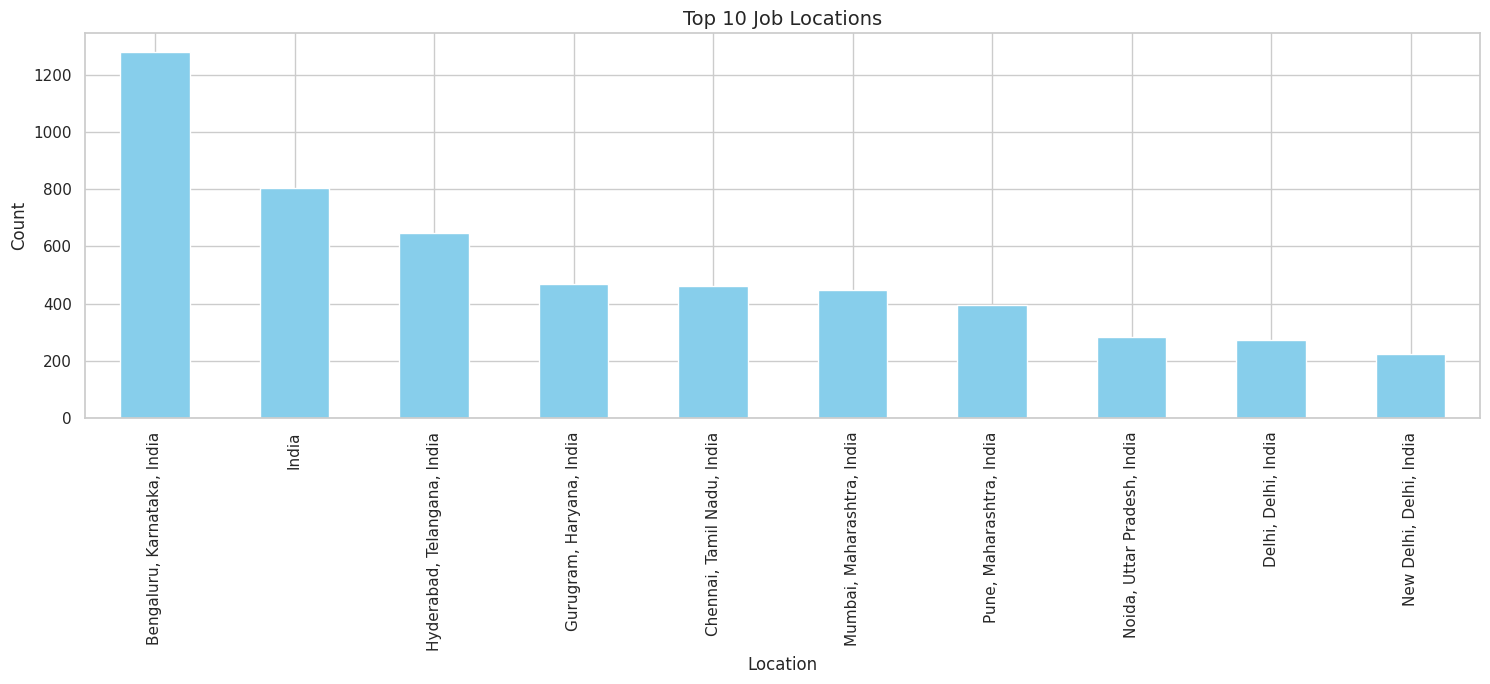

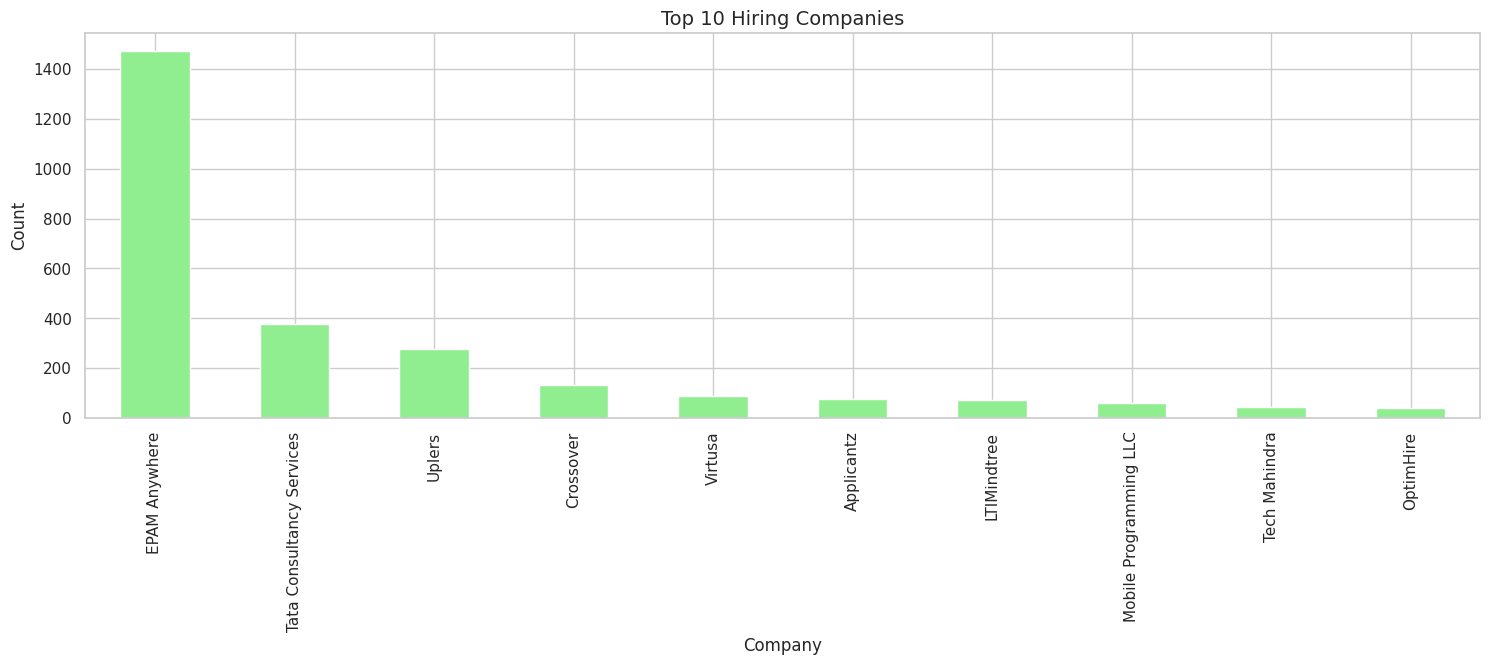

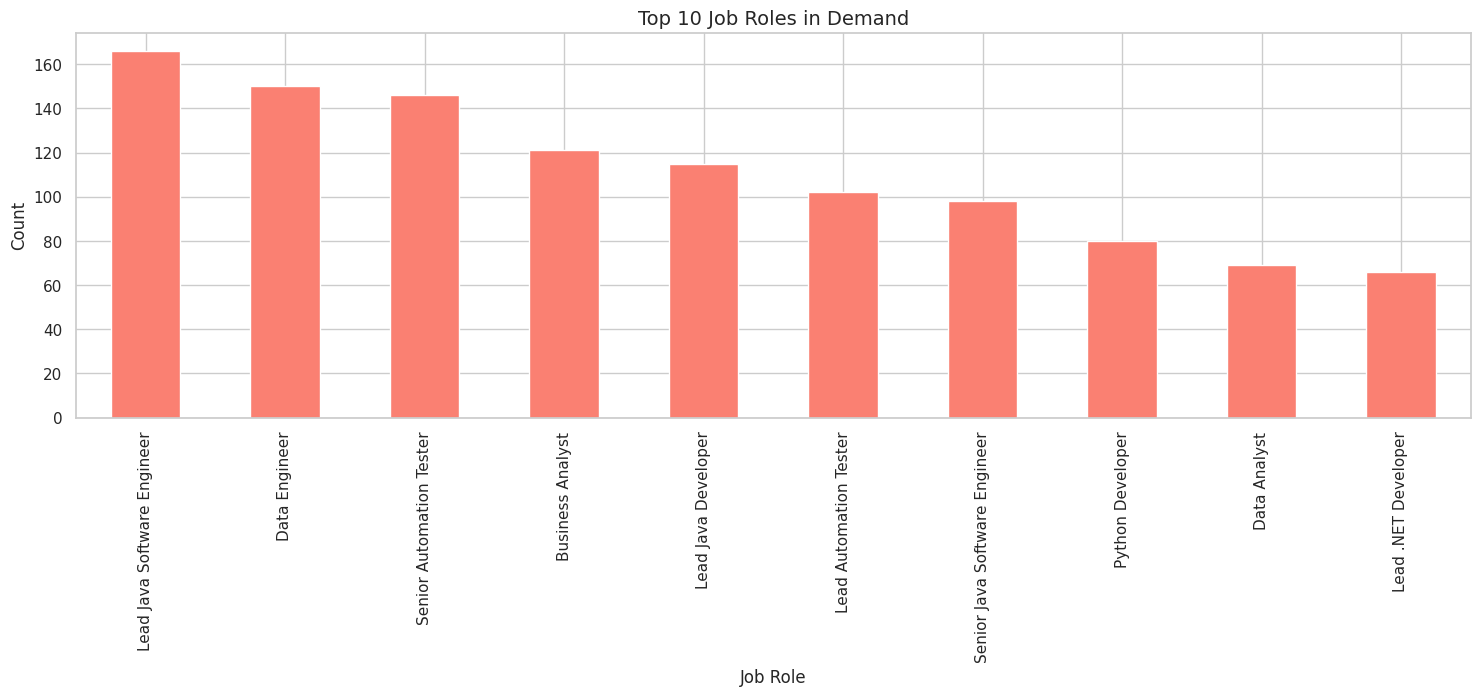

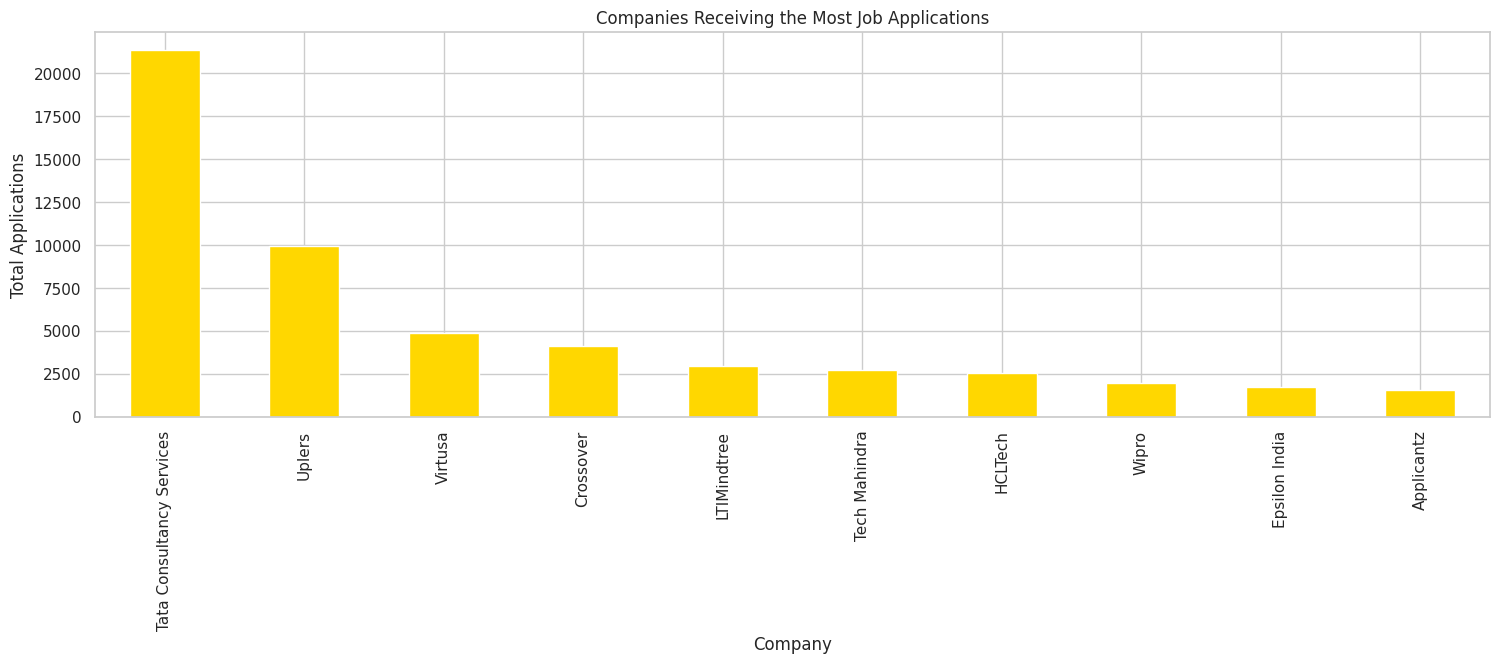

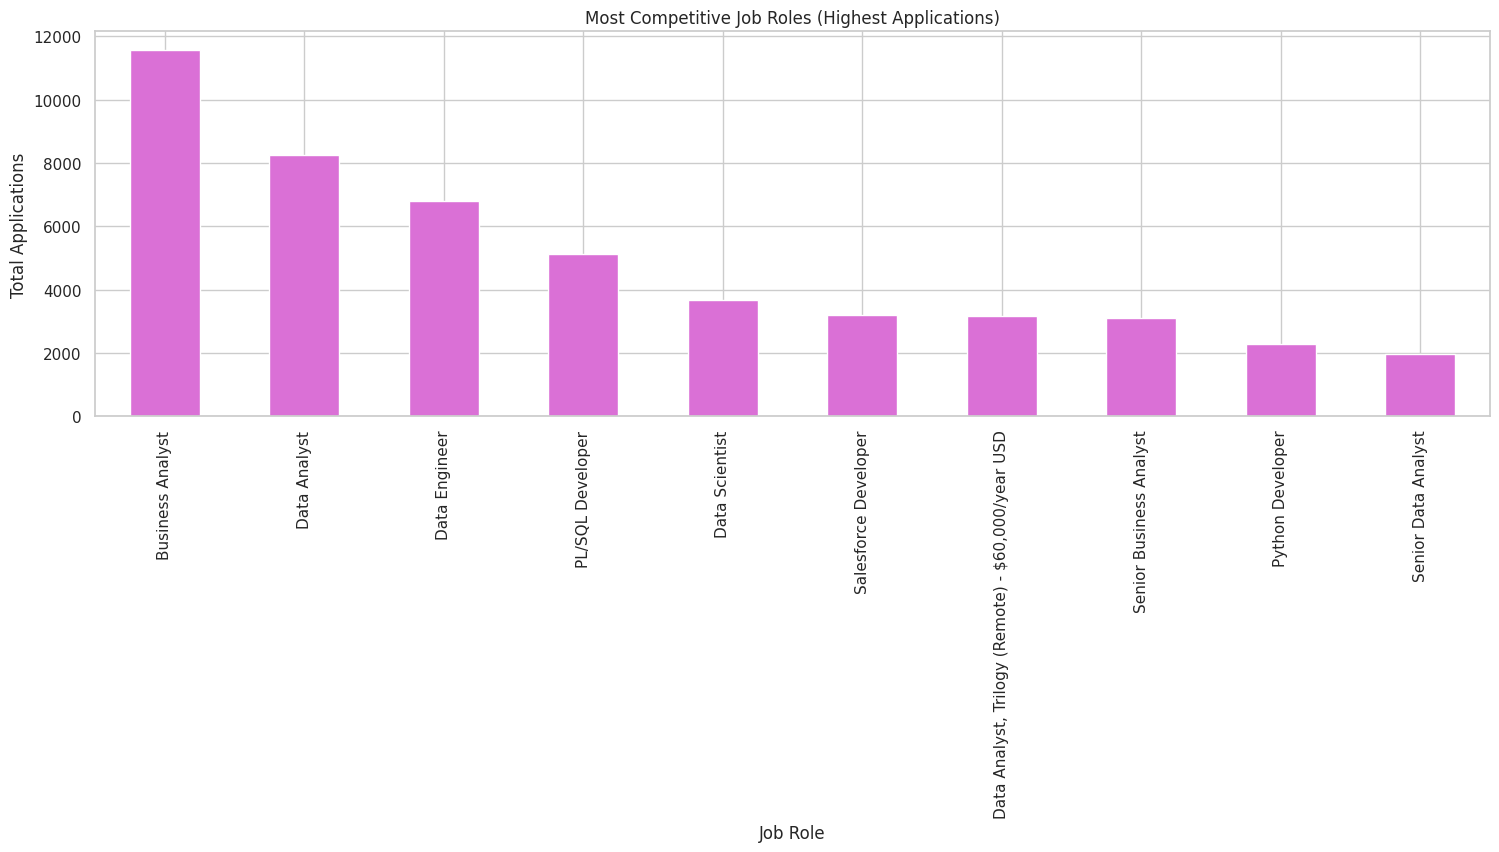

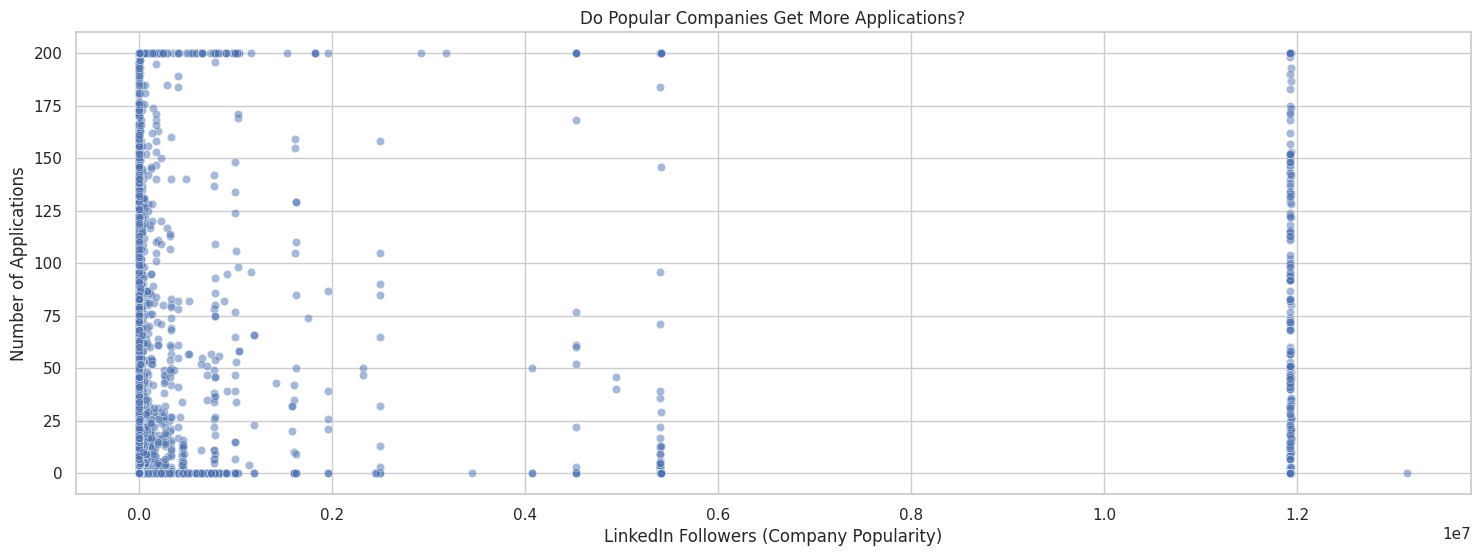

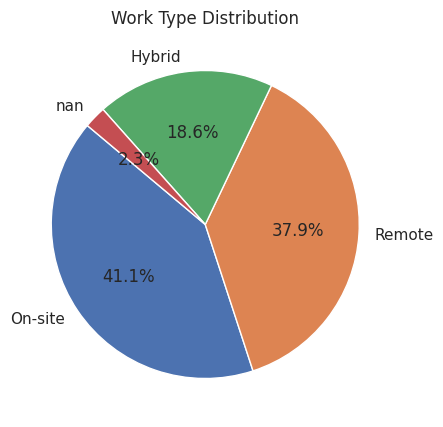

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 10 Job Locations
plt.figure(figsize=(18,5))
df['location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Job Locations", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.show()


# Top 10 Hiring Companies
plt.figure(figsize=(18,5))
df['company_name'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Hiring Companies", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Company")
plt.xticks(rotation=90)
plt.show()


# Most Common Job Titles
plt.figure(figsize=(18,5))
df['job'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Job Roles in Demand", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Job Role")
plt.xticks(rotation=90)
plt.show()


# Companies with the Most Applications
top_applications = df.groupby('company_name')['no_of_application'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,5))
top_applications.plot(kind='bar', color='gold')
plt.title("Companies Receiving the Most Job Applications")
plt.xlabel("Company")
plt.ylabel("Total Applications")
plt.xticks(rotation=90)
plt.show()


# Job Roles with the Most Applications
top_roles = df.groupby('job')['no_of_application'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,5))
top_roles.plot(kind='bar', color='orchid')
plt.title("Most Competitive Job Roles (Highest Applications)")
plt.xlabel("Job Role")
plt.ylabel("Total Applications")
plt.xticks(rotation=90)
plt.show()


# Followers vs Applications (Popularity vs Attractiveness)
plt.figure(figsize=(18,6))
sns.scatterplot(
    x=df['linkedin_followers'],
    y=df['no_of_application'],
    alpha=0.5
)
plt.title("Do Popular Companies Get More Applications?")
plt.xlabel("LinkedIn Followers (Company Popularity)")
plt.ylabel("Number of Applications")
plt.show()


# Work Type Distribution (Full-time, Remote, etc.)
plt.figure(figsize=(8,5))
df['work_type'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Work Type Distribution")
plt.ylabel("")
plt.show()

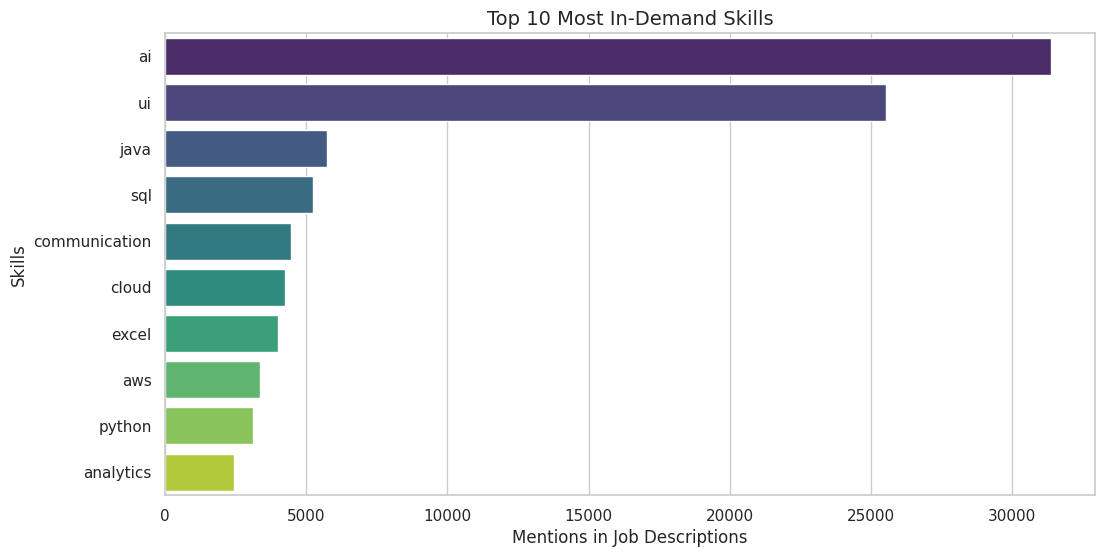

In [58]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all job details into one long text
all_text = " ".join(df['job_details'].astype(str)).lower()

# Common skill keywords to search for
skill_keywords = [
    'python', 'java', 'sql', 'excel', 'power bi', 'tableau', 'aws',
    'javascript', 'react', 'node', 'communication', 'leadership',
    'machine learning', 'deep learning', 'analytics', 'data analysis',
    'project management', 'ui', 'ux', 'cloud', 'azure', 'google cloud',
    'css', 'html', 'business analysis', 'data science', 'ai',
]

# Count occurrence of each skill
skill_count = {}
for skill in skill_keywords:
    skill_count[skill] = len(re.findall(skill, all_text))

skill_df = pd.DataFrame(list(skill_count.items()), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values(by='Count', ascending=False)

# Top 10 In-Demand Skills Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x='Count',
    y='Skill',
    data=skill_df.head(10),
    hue='Skill',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Most In-Demand Skills", fontsize=14)
plt.xlabel("Mentions in Job Descriptions")
plt.ylabel("Skills")
plt.show()


# ***Step 4- Predicting Future Skill Demands (using ML)***

Skill counts by time group (Older -> Mid -> Recent):

           Older    Mid  Recent
python       981   1559     575
sql         2205   1637    1384
java        1235   3172    1326
analytics    670   1022     748
ui          7669   8668    9205
ai          8384  12389   10598

Forecast (relative mention counts) for next 3 future steps:

           Future+1  Future+2  Future+3
python        632.3     429.3     226.3
sql           921.0     510.5     100.0
java         2002.0    2047.5    2093.0
analytics     891.3     930.3     969.3
ui          10050.0   10818.0   11586.0
ai          12671.0   13778.0   14885.0


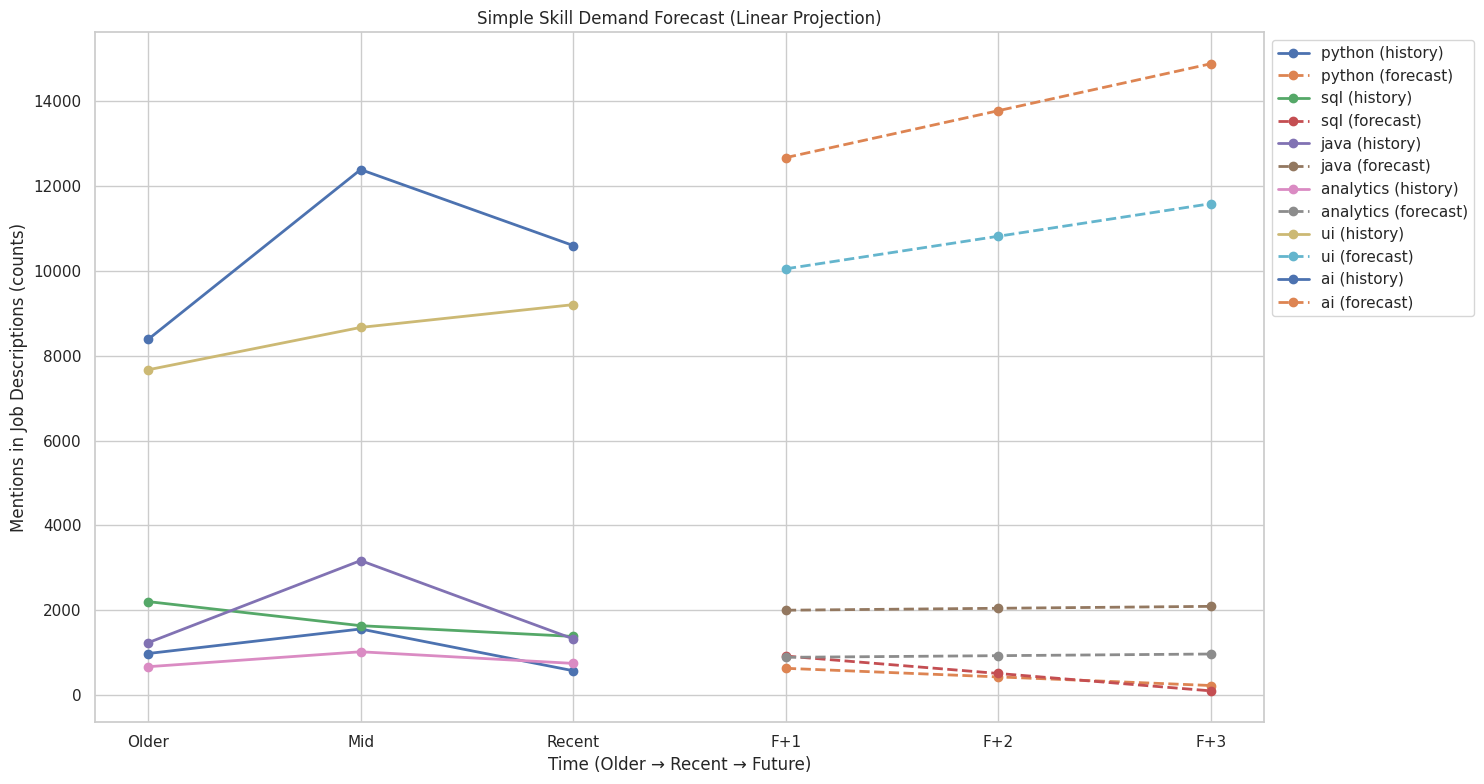

In [75]:
#Skill-Demand Forecast (Linear Regression)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

# Preparing 3 time groups
df = df.reset_index(drop=True)
n = len(df)
df['time_group'] = pd.cut(
    df.index,
    bins=[0, n//3, 2*n//3, n],
    labels=['Older', 'Mid', 'Recent'],
    include_lowest=True
)

# Defining skills to forecast
skills = ['python', 'sql', 'java', 'analytics', 'ui', 'ai']

# Building counts per skill per time group
skill_counts = {}
for skill in skills:
    counts = []
    for grp in ['Older','Mid','Recent']:    # chronological order
        text = " ".join(df[df['time_group']==grp]['job_details'].astype(str)).lower()
        counts.append(text.count(skill))
    skill_counts[skill] = counts

skill_trend_df = pd.DataFrame(skill_counts, index=['Older','Mid','Recent']).T
print("Skill counts by time group (Older -> Mid -> Recent):\n")
print(skill_trend_df)

# Fit a tiny linear model per skill and predict forward
x_train = np.array([-2, -1, 0]).reshape(-1,1)
x_future = np.array([1, 2, 3]).reshape(-1,1)   # 3 future steps

forecast_results = {}
for skill in skill_trend_df.index:
    y = skill_trend_df.loc[skill].values.astype(float)   # [Older, Mid, Recent]
    model = LinearRegression()
    model.fit(x_train, y)
    preds = model.predict(x_future)   # predictions for future steps
    forecast_results[skill] = preds

forecast_df = pd.DataFrame(forecast_results, index=['Future+1','Future+2','Future+3']).T
print("\nForecast (relative mention counts) for next 3 future steps:\n")
print(forecast_df.round(1))

# Results for top skills
top_plot = list(skill_trend_df.index)
plt.figure(figsize=(15,8))
for skill in top_plot:
    # historical points
    ys = skill_trend_df.loc[skill].values
    xs = [-2, -1, 0]
    plt.plot(xs, ys, 'o-', label=f'{skill} (history)', linewidth=2)
    # forecasts
    pf = forecast_results[skill]
    plt.plot([1,2,3], pf, 'o--', label=f'{skill} (forecast)', linewidth=2)

plt.xticks([-2,-1,0,1,2,3], ['Older','Mid','Recent','F+1','F+2','F+3'])
plt.xlabel('Time (Older → Recent → Future)')
plt.ylabel('Mentions in Job Descriptions (counts)')
plt.title('Simple Skill Demand Forecast (Linear Projection)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()
